# Second Trial

## .npy -> .json 

In [1]:
import numpy as np
import json
import os

parent_dir = "/home/saihan/data"

sharegpt_data = []
for emotion_label in os.listdir(parent_dir):
    folder_path = os.path.join(parent_dir, emotion_label)
    if not os.path.isdir(folder_path):
        continue
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".npy"):
            file_path = os.path.join(folder_path, file_name)

            try:
                features = np.load(file_path)
                for feature_vector in features:
                    feature_str = ", ".join([f"Feature {j+1} = {val:.2E}" for j, val in enumerate(feature_vector)])
                    sharegpt_data.append({
                        "conversations": [
                            {"from": "user", "value": f"EMG features: {feature_str}"},
                            {"from": "assistant", "value": f"Emotion: {emotion_label.capitalize()}"}
                        ]
                    })
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

output_path = "emg_all_emotions_sharegpt.json"
with open(output_path, "w") as f:
    json.dump(sharegpt_data, f, indent=4)

print(f" Conversion complete! JSON saved as {output_path}")


 Conversion complete! JSON saved as emg_all_emotions_sharegpt.json


In [3]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b!
    "unsloth/Mistral-Small-Instruct-2409",     # Mistral 22b 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3.5-mini-instruct",           # Phi-3.5 2x faster!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",            # Gemma 2x faster!

    "unsloth/Llama-3.2-1B-bnb-4bit",           # NEW! Llama 3.2 models
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" # NEW! Llama 3.3 70B!
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-3B-Instruct", # or choose "unsloth/Llama-3.2-1B-Instruct"
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/home/saihan/miniconda3/envs/unsloth/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.3.
   \\   /|    NVIDIA GeForce RTX 3050 Laptop GPU. Num GPUs = 1. Max memory: 4.0 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [2]:
pip install numpy 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 11.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


# FOR ALL Emotions

half emotions

In [ ]:
import numpy as np
import json
import os

BASE_DIR = "/home/saihan/New folder/data" 
OUTPUT_DIR = "output_datasets"  
EMOTIONS = {
    "happiness": "Happy",
    "sadness": "Sad",
    "anger": "Angry",
    "fear": "Fearful",
    "surprise": "Surprised",
    "disgust": "Disgusted"
}
FILE_INDEXES = [1, 2, 3, 4,5,6,7,8,9,10] 
os.makedirs(OUTPUT_DIR, exist_ok=True)

for emotion_key, label in EMOTIONS.items():
    emotion_dir = os.path.join(BASE_DIR, emotion_key)
    sharegpt_data = []

    for i in FILE_INDEXES:
        file_name = f"{emotion_key}_{i}.npy"
        file_path = os.path.join(emotion_dir, file_name)

        if not os.path.exists(file_path):
            print(f"[SKIP] File not found: {file_path}")
            continue

        # Load feature vectors
        features = np.load(file_path)

        # Format into chat structure
        for feature_vector in features:
            feature_str = ", ".join([f"Feature {j+1} = {val:.2E}" for j, val in enumerate(feature_vector)])
            sharegpt_data.append({
                "conversations": [
                    {"from": "user", "value": f"EMG features: {feature_str}"},
                    {"from": "assistant", "value": f"Emotion: {label}"}
                ]
            })

        print(f"[OK] Processed {file_name} with {len(features)} samples.")

    # Save the JSON file
    output_file = os.path.join(OUTPUT_DIR, f"{emotion_key}_sharegpt.json")
    with open(output_file, "w") as f:
        json.dump(sharegpt_data, f, indent=4)

    print(f"[DONE] Saved: {output_file} with {len(sharegpt_data)} samples\n")


[OK] Processed happiness_1.npy with 45018 samples.
[OK] Processed happiness_2.npy with 45018 samples.
[OK] Processed happiness_3.npy with 45030 samples.
[OK] Processed happiness_4.npy with 45030 samples.
[OK] Processed happiness_5.npy with 45031 samples.
[OK] Processed happiness_6.npy with 45030 samples.
[OK] Processed happiness_7.npy with 45031 samples.
[OK] Processed happiness_8.npy with 45031 samples.
[OK] Processed happiness_9.npy with 45030 samples.
[OK] Processed happiness_10.npy with 45018 samples.
[DONE] Saved: output_datasets/happiness_sharegpt.json with 450267 samples

[OK] Processed sadness_1.npy with 45030 samples.
[OK] Processed sadness_2.npy with 45031 samples.
[OK] Processed sadness_3.npy with 45031 samples.
[OK] Processed sadness_4.npy with 45031 samples.
[OK] Processed sadness_5.npy with 45030 samples.
[OK] Processed sadness_6.npy with 45031 samples.
[OK] Processed sadness_7.npy with 45031 samples.
[OK] Processed sadness_8.npy with 45018 samples.
[OK] Processed sadness

In [3]:
EMOTIONS = ["happiness", "sadness", "anger", "fear", "surprise", "disgust"]
JSON_PATHS = [f"data/{e}/{e}_{i}.npy" for e in EMOTIONS for i in [1,2,3,4,5,6,7,8,9,10]]

In [ ]:
from unsloth import FastLanguageModel, get_chat_template
from transformers import TrainingArguments, DataCollatorForLanguageModeling
from trl import SFTTrainer
from datasets import load_dataset, concatenate_datasets, load_from_disk
import torch
import os
import json
from functools import partial
import gc

# === CONFIGURATION ===
MODEL_NAME = "unsloth/Llama-3.2-3B-Instruct"
JSON_PATHS = [
    "output_datasets/happiness_sharegpt.json",
    "output_datasets/sadness_sharegpt.json",
    "output_datasets/anger_sharegpt.json",
    "output_datasets/fear_sharegpt.json",
    "output_datasets/surprise_sharegpt.json",
    "output_datasets/disgust_sharegpt.json"
]
CACHE_PATH = "dataset_cache_emg"
MODEL_SAVE_PATH = "stage1_model_emg_6emotions"

# === OPTIMIZATION SETTINGS FOR 4GB GPU ===
MAX_SAMPLES = 50000  # Drastically reduce dataset size
SUBSET_EACH_EMOTION = 8000  # ~8k samples per emotion = ~48k total

torch.backends.cudnn.benchmark = True
os.environ["TOKENIZERS_PARALLELISM"] = "false"

print("Loading model and tokenizer...")
model, tokenizer = FastLanguageModel.from_pretrained(
    MODEL_NAME,
    max_seq_length=1024,  # Reduced from 2048 to save memory
    load_in_4bit=True,
    device_map="auto"
)

# More aggressive LoRA settings for 4GB GPU
model = FastLanguageModel.get_peft_model(
    model,
    r=8,  # Reduced from 16
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
    lora_alpha=8,  # Reduced from 16
    lora_dropout=0.1,  # Added dropout
    bias="none",
    use_gradient_checkpointing="unsloth",
    random_state=3407,
    use_rslora=False,
    loftq_config=None,
)

tokenizer = get_chat_template(
    tokenizer,
    chat_template="llama-3",
    mapping={"role": "from", "content": "value", "user": "user", "assistant": "assistant"}
)

# === OPTIMIZED DATASET LOADING ===
def load_and_sample_datasets():
    """Load datasets and sample a subset for faster training"""
    if os.path.exists(CACHE_PATH + "_sampled"):
        print("Loading cached sampled dataset...")
        return load_from_disk(CACHE_PATH + "_sampled")

    datasets = []
    for path in JSON_PATHS:
        if os.path.exists(path):
            print(f"Loading and sampling {path}...")
            ds = load_dataset("json", data_files=path, split="train")
            
            # Sample a subset from each emotion dataset
            if len(ds) > SUBSET_EACH_EMOTION:
                ds = ds.shuffle(seed=42).select(range(SUBSET_EACH_EMOTION))
                print(f"Sampled {len(ds)} examples from {path}")
            
            datasets.append(ds)
        else:
            print(f"File not found: {path}")

    if not datasets:
        raise FileNotFoundError("No valid dataset files found.")

    full_dataset = concatenate_datasets(datasets)
    full_dataset = full_dataset.shuffle(seed=42)
    
    # Final cap on total samples
    if len(full_dataset) > MAX_SAMPLES:
        full_dataset = full_dataset.select(range(MAX_SAMPLES))
    
    print(f"Final dataset size: {len(full_dataset)} samples")
    full_dataset.save_to_disk(CACHE_PATH + "_sampled")
    return full_dataset

# === 1. Load Sampled Dataset ===
full_dataset = load_and_sample_datasets()

# === 2. Train-Test Split ===
split_data = full_dataset.train_test_split(test_size=0.1, seed=42)  # Reduced test size
print(f"Train samples: {len(split_data['train'])}, Test samples: {len(split_data['test'])}")

# === 3. Optimized Training Config for 4GB GPU ===
total_samples = len(split_data["train"])

# Very conservative settings for 4GB GPU
batch_size = 1  # Start with batch size of 1
grad_accum = 8  # High gradient accumulation to simulate larger batches
max_seq_length = 512  # Further reduced sequence length

print(f"Using batch size: {batch_size}, gradient accumulation: {grad_accum}")
print(f"Max sequence length: {max_seq_length}")

num_epochs = 1  # Reduced epochs for faster training
steps_per_epoch = max(1, total_samples // (batch_size * grad_accum))
total_steps = steps_per_epoch * num_epochs
warmup_steps = max(1, int(0.05 * total_steps))  # Reduced warmup

print(f"Steps per epoch: {steps_per_epoch}, Total steps: {total_steps}")

training_args = TrainingArguments(
    output_dir="training_outputs",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    gradient_accumulation_steps=grad_accum,
    eval_strategy="steps",
    eval_steps=max(100, steps_per_epoch // 2), 
    save_strategy="steps",
    save_steps=max(200, steps_per_epoch // 2),  
    num_train_epochs=num_epochs,
    max_steps=total_steps,
    learning_rate=2e-4, 
    weight_decay=0.01,
    optim="paged_adamw_8bit",
    lr_scheduler_type="cosine",
    warmup_steps=warmup_steps,
    fp16=False,  # Force FP16 for memory savings
    bf16=True,
    dataloader_pin_memory=False,  
    gradient_checkpointing=True,
    dataloader_num_workers=0,  
    remove_unused_columns=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    logging_steps=50,
    report_to="none",
    seed=42,
    dataloader_drop_last=True,
    prediction_loss_only=True,
    save_total_limit=1,  
    load_best_model_at_end=False,  
)

# === 4. Data Collator ===
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
    pad_to_multiple_of=8,
    return_tensors="pt"
)

# === 5. Create text field for dataset ===
def create_text_field(example):
    """Convert conversations to a single text field"""
    conversations = example["conversations"]
    text = ""
    
    for turn in conversations:
        role = turn.get("from", "")
        content = turn.get("value", "")
        
        if role == "user":
            text += f"### User:\n{content}\n"
        elif role == "assistant":
            text += f"### Assistant:\n{content}\n"
    
    return {"text": text}

# Apply the text field creation to the dataset
print("Creating text field for dataset...")
split_data["train"] = split_data["train"].map(create_text_field, num_proc=1)  # Reduced processes
split_data["test"] = split_data["test"].map(create_text_field, num_proc=1)

print("Sample text field:")
print(split_data["train"][0]["text"][:200] + "...")

# === 6. Trainer Initialization ===
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    train_dataset=split_data["train"],
    eval_dataset=split_data["test"],
    max_seq_length=max_seq_length,
    data_collator=data_collator,
    packing=False,
    dataset_num_proc=1,
    dataset_text_field="text"
)

# === 7. Aggressive Memory Optimizations ===
model.config.use_cache = False
if hasattr(model, 'gradient_checkpointing_enable'):
    model.gradient_checkpointing_enable()

# Clear cache before training
gc.collect()
torch.cuda.empty_cache()

# === 8. Optimized Training Function ===
def train_with_optimizations():
    try:
        print("=== MEMORY STATUS BEFORE TRAINING ===")
        if torch.cuda.is_available():
            print(f"GPU Memory allocated: {torch.cuda.memory_allocated()/1024**3:.2f}GB")
            print(f"GPU Memory cached: {torch.cuda.memory_reserved()/1024**3:.2f}GB")
        
        print("Starting optimized training...")
        trainer.train()

        print("Training completed successfully!")
        trainer.save_model(MODEL_SAVE_PATH)
        tokenizer.save_pretrained(MODEL_SAVE_PATH)
        
        print("=== MEMORY STATUS AFTER TRAINING ===")
        if torch.cuda.is_available():
            print(f"GPU Memory allocated: {torch.cuda.memory_allocated()/1024**3:.2f}GB")
            print(f"GPU Memory cached: {torch.cuda.memory_reserved()/1024**3:.2f}GB")

    except RuntimeError as e:
        if "out of memory" in str(e).lower():
            print("=== OUT OF MEMORY ERROR ===")
            print("Try these solutions:")
            print("1. Reduce batch_size to 1")
            print("2. Increase grad_accum to 16")
            print("3. Reduce max_seq_length to 256")
            print("4. Reduce r in LoRA to 4")
            print("5. Use even fewer samples (MAX_SAMPLES = 10000)")
        trainer.save_model("failed_training_checkpoint")
        raise
    except Exception as e:
        print(f"Training failed: {str(e)}")
        trainer.save_model("failed_training_checkpoint")
        raise

# Start training
train_with_optimizations()

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch Gemma3ForConditionalGeneration.
🦥 Unsloth Zoo will now patch everything to make training faster!
Loading model and tokenizer...
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA GeForce RTX 3050 Laptop GPU. Num GPUs = 1. Max memory: 4.0 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.1.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.3.19 patched 28 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


Loading cached sampled dataset...
Train samples: 43200, Test samples: 4800
Using batch size: 1, gradient accumulation: 8
Max sequence length: 512
Steps per epoch: 5400, Total steps: 5400
Creating text field for dataset...


Map:   0%|          | 0/43200 [00:00<?, ? examples/s]

Map:   0%|          | 0/4800 [00:00<?, ? examples/s]

Sample text field:
### User:
EMG features: Feature 1 = 5.37E-07, Feature 2 = -1.25E-05, Feature 3 = -6.49E-06, Feature 4 = -4.59E-06, Feature 5 = -5.71E-06, Feature 6 = -9.08E-06, Feature 7 = 1.07E-06, Feature 8 = 4.35E...


Unsloth: Tokenizing ["text"]:   0%|          | 0/43200 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["text"]:   0%|          | 0/4800 [00:00<?, ? examples/s]

=== MEMORY STATUS BEFORE TRAINING ===
GPU Memory allocated: 2.26GB
GPU Memory cached: 2.28GB
Starting optimized training...


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 43,200 | Num Epochs = 1 | Total steps = 5,400
O^O/ \_/ \    Batch size per device = 1 | Gradient accumulation steps = 8
\        /    Data Parallel GPUs = 1 | Total batch size (1 x 8 x 1) = 8
 "-____-"     Trainable parameters = 12,156,928/3,000,000,000 (0.41% trained)


Step,Training Loss,Validation Loss
2700,0.513600,0.511031
5400,0.506700,0.507574


Unsloth: Not an error, but LlamaForCausalLM does not accept `num_items_in_batch`.
Using gradient accumulation will be very slightly less accurate.
Read more on gradient accumulation issues here: https://unsloth.ai/blog/gradient
/home/saihan/miniconda3/lib/python3.12/site-packages/peft/utils/other.py:1110: UserWarning: Unable to fetch remote file due to the following error (ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: f8c4a7e5-e6f5-4927-90cb-9a17dfc5df1d)') - silently ignoring the lookup for the file config.json in unsloth/llama-3.2-3b-instruct-unsloth-bnb-4bit.
  warnings.warn(
/home/saihan/miniconda3/lib/python3.12/site-packages/peft/utils/save_and_load.py:236: UserWarning: Could not find a config file in unsloth/llama-3.2-3b-instruct-unsloth-bnb-4bit - will assume that the vocabulary was not modified.
  warnings.warn(


Training completed successfully!
=== MEMORY STATUS AFTER TRAINING ===
GPU Memory allocated: 2.34GB
GPU Memory cached: 2.44GB


In [1]:
model_path = "/home/saihan/New folder/stage1_model_emg_6emotions"
metadata_path = "/home/saihan/New folder/stage1_model_emg_6emotions/metadata.pkl"
dataset_path = "/home/saihan/New folder/dataset_cache_emg_sampled"


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch Gemma3ForConditionalGeneration.
🦥 Unsloth Zoo will now patch everything to make training faster!
Loading model and tokenizer...
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA GeForce RTX 3050 Laptop GPU. Num GPUs = 1. Max memory: 4.0 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth 2025.3.19 patched 28 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


Using device: cuda, VRAM: 4.3 GB
Loading test dataset...
Test dataset size: 4800 samples


Extracting features and labels: 100%|████████████████████████████████████████████| 4800/4800 [00:00<00:00, 16861.93it/s]


Extracted 4800 valid samples, skipped 0 invalid samples


Predicting:   0%|                                                                      | 1/1200 [00:02<45:06,  2.26s/it]

Sample 1:
  Prompt: EMG features: Feature 1 = 1.11E-05, Feature 2 = 1.94E-05, Feature 3 = 1.15E-05, Feature 4 = 3.81E-06...
  Response: emg features: feature 1 = 1.11e-05, feature 2 = 1.94e-05, feature 3 = 1.15e-05, feature 4 = 3.81e-06, feature 5 = 1.44e-05, feature 6 = 1.17e-05, feature 7 = 1.40e-05, feature 8 = 2.32e-05

classify the emotion as one of: happy, sad, angry, fearful, surprised, disgusted. output only the emotion.

fearful
  Predicted: Happy
Sample 2:
  Prompt: EMG features: Feature 1 = -2.71E-05, Feature 2 = -2.65E-05, Feature 3 = 2.86E-05, Feature 4 = 2.06E-...
  Response: emg features: feature 1 = -2.71e-05, feature 2 = -2.65e-05, feature 3 = 2.86e-05, feature 4 = 2.06e-05, feature 5 = 9.72e-06, feature 6 = 1.36e-05, feature 7 = -6.01e-06, feature 8 = -3.87e-05

classify the emotion as one of: happy, sad, angry, fearful, surprised, disgusted. output only the emotion.

fearful
  Predicted: Happy


Predicting: 100%|███████████████████████████████████████████████████████████████████| 1200/1200 [18:44<00:00,  1.07it/s]
/home/saihan/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/saihan/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/saihan/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division


Accuracy: 0.1669

Classification Report:
              precision    recall  f1-score   support

       Happy       0.17      1.00      0.29       801
         Sad       0.00      0.00      0.00       813
       Angry       0.00      0.00      0.00       787
     Fearful       0.00      0.00      0.00       812
   Surprised       0.00      0.00      0.00       839
   Disgusted       0.00      0.00      0.00       748

    accuracy                           0.17      4800
   macro avg       0.03      0.17      0.05      4800
weighted avg       0.03      0.17      0.05      4800



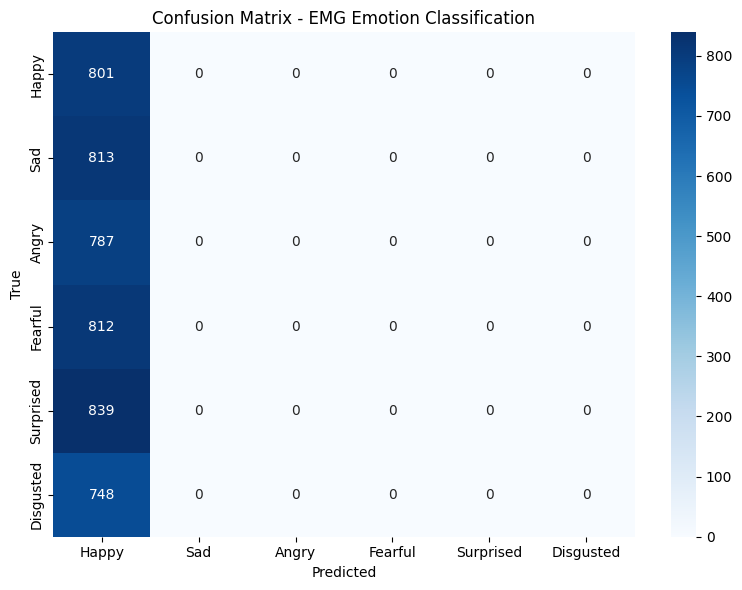

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from datasets import load_from_disk
from unsloth import FastLanguageModel
import re
from tqdm import tqdm
import os

def evaluate_emg_model(model_path, dataset_path, emotions=["Happy", "Sad", "Angry", "Fearful", "Surprised", "Disgusted"], batch_size=4, cache_dir="preprocessed_data"):
    # Initialize label mappings
    label_map = {emotion: idx for idx, emotion in enumerate(emotions)}
    id_to_label = {idx: emotion for emotion, idx in label_map.items()}
    
    # Load model and tokenizer
    print("Loading model and tokenizer...")
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_path,
        max_seq_length=256,  # Reduced for speed
        load_in_4bit=True,
    )
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Using device: {device}, VRAM: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
    
    # Load test dataset
    print("Loading test dataset...")
    dataset = load_from_disk(dataset_path)
    test_dataset = dataset['test'] if 'test' in dataset else dataset.train_test_split(test_size=0.1, seed=42)['test']
    print(f"Test dataset size: {len(test_dataset)} samples")
    
    # Cache preprocessed features and labels
    cache_file = os.path.join(cache_dir, "preprocessed.npz")
    if os.path.exists(cache_file):
        print("Loading cached features and labels...")
        data = np.load(cache_file)
        features, true_labels = data['features'], data['labels']
    else:
        def extract_features_and_labels(dataset):
            features, true_labels = [], []
            invalid_samples = 0
            for i, example in enumerate(tqdm(dataset, desc="Extracting features and labels")):
                try:
                    user_message = example["conversations"][0]["value"]
                    feature_values = [float(val) for val in re.findall(r"Feature \d+ = ([-\d.E+]+)", user_message)]
                    if len(feature_values) != 8:
                        invalid_samples += 1
                        continue
                    features.append(feature_values)
                    
                    label_text = example["conversations"][1]["value"].replace("Emotion: ", "").strip()
                    if label_text not in label_map:
                        invalid_samples += 1
                        continue
                    true_labels.append(label_map[label_text])
                except Exception as e:
                    invalid_samples += 1
                    print(f"Error in sample {i}: {e}")
                    continue
            print(f"Extracted {len(features)} valid samples, skipped {invalid_samples} invalid samples")
            if len(features) == 0:
                raise ValueError("No valid samples extracted")
            return np.array(features), np.array(true_labels)
        
        features, true_labels = extract_features_and_labels(test_dataset)
        os.makedirs(cache_dir, exist_ok=True)
        np.savez(cache_file, features=features, labels=true_labels)
    
    # Make predictions
    def predict_emotions(features):
        predictions = []
        for i in tqdm(range(0, len(features), batch_size), desc="Predicting"):
            batch_features = features[i:i+batch_size]
            prompts = [f"EMG features: {', '.join(f'Feature {j+1} = {val:.2E}' for j, val in enumerate(f))}\n\nClassify the emotion as one of: {', '.join(emotions)}. Output only the emotion name." for f in batch_features]
            
            inputs = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
            with torch.no_grad():
                outputs = model.generate(
                    **inputs,
                    max_new_tokens=5,  # Reduced for speed
                    temperature=0.1,
                    pad_token_id=tokenizer.eos_token_id
                )
            
            for j, (output, prompt) in enumerate(zip(outputs, prompts)):
                response =tokenizer.decode(output, skip_special_tokens=True).replace(prompt, "").strip().lower()
                for emotion in emotions:
                    if emotion.lower() in response:
                        predictions.append(label_map[emotion])
                        break
                else:
                    predictions.append(0)  # Default to Happy
                    print(f"⚠️ No emotion matched in response: '{response}'")
                if i == 0 and j < 2:  # Debug first two samples
                    print(f"Sample {i+j+1}:")
                    print(f"  Prompt: {prompts[j][:100]}...")
                    print(f"  Response: {response}")
                    print(f"  Predicted: {id_to_label[predictions[-1]]}")
        if not predictions:
            raise ValueError("No predictions generated")
        return np.array(predictions)
    
    predictions = predict_emotions(features)
    
    if len(true_labels) != len(predictions):
        raise ValueError(f"Mismatch: {len(true_labels)} true labels, {len(predictions)} predictions")
    
    accuracy = accuracy_score(true_labels, predictions)
    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(true_labels, predictions, target_names=emotions, labels=list(id_to_label.keys())))
    
    # Plot confusion matrix
    cm = confusion_matrix(true_labels, predictions, labels=list(id_to_label.keys()))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
    plt.title('Confusion Matrix - EMG Emotion Classification')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    return accuracy, cm

model_path = "/home/saihan/New folder/stage1_model_emg_6emotions"
dataset_path = "/home/saihan/New folder/dataset_cache_emg_sampled"
accuracy, confusion_matrix = evaluate_emg_model(model_path, dataset_path)

In [ ]:
import torch
from unsloth import FastLanguageModel

model_path = "/home/saihan/New folder/stage1_model_emg_6emotions"

print("Loading model and tokenizer...")
model, tokenizer = FastLanguageModel.from_pretrained(
    model_path,
    max_seq_length=128, 
    load_in_4bit=True,
    device_map="auto"
)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}, VRAM: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
Loading model and tokenizer...
==((====))==  Unsloth 2025.6.5: Fast Llama patching. Transformers: 4.52.4.
   \\   /|    NVIDIA GeForce RTX 3050 Laptop GPU. Num GPUs = 1. Max memory: 4.0 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth 2025.6.5 patched 28 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


Using device: cuda, VRAM: 4.3 GB


In [ ]:
# Define emotions
emotions = ["Happy", "Sad", "Angry", "Fearful", "Surprised", "Disgusted"]

features = [3.96E-06, 1.67E-05, 1.81E-05, 1.96E-05, 4.79E-06, 5.37E-07, 1.95E-07, -1.66E-06]

prompt = f"EMG features: {', '.join(f'Feature {j+1} = {val:.2E}' for j, val in enumerate(features))}\n\nClassify the emotion as one of: {', '.join(emotions)}. Output only the emotion name."
inputs = tokenizer([prompt], return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
with torch.no_grad():
    output = model.generate(**inputs, max_new_tokens=5, temperature=0.1, pad_token_id=tokenizer.eos_token_id)
response = tokenizer.decode(output[0], skip_special_tokens=True).replace(prompt, "").strip().lower()
def extract_emotion(response, emotions):
    for emotion in emotions:
        if emotion.lower() in response:
            return emotion
    print(f"No emotion matched in response: '{response}'")
    return "fy"  # Default

predicted_emotion = extract_emotion(response, emotions)
print(f"Prompt: {prompt[:100]}...")
print(f"Raw Response: {response}")
print(f"Predicted Emotion: {predicted_emotion}")

Prompt: EMG features: Feature 1 = 3.96E-06, Feature 2 = 1.67E-05, Feature 3 = 1.81E-05, Feature 4 = 1.96E-05...
Raw Response: emg features: feature 1 = 3.96e-06, feature 2 = 1.67e-05, feature 3 = 1.81e-05, feature 4 = 1.96e-05, feature 5 = 4.79e-06, feature 6 = 5.37e-07, feature 7 = 1.95e-07, feature 8 = -1.66e-06

classify the emotion as one of: happy, sad, angry, fearful, surprised, disgusted. output only the emotion.

sad
Predicted Emotion: Happy


In [1]:
from unsloth import FastLanguageModel

model_path = "/home/saihan/New folder/stage1_model_emg_6emotions"
emotions=["Happy", "Sad", "Angry", "Fearful", "Surprised", "Disgusted"]

model, tokenizer = FastLanguageModel.from_pretrained(model_path, max_seq_length=512, load_in_4bit=True)
model.eval()
prompt = f"EMG features: Feature 1 = 1.23E-4, Feature 2 = -2.34E-4, Feature 3 = 3.45E-4, Feature 4 = 4.56E-4, Feature 5 = -5.67E-4, Feature 6 = 6.78E-4, Feature 7 = 7.89E-4, Feature 8 = -8.90E-4\n\nClassify the emotion as one of: {', '.join(emotions)}. Output only the emotion name."
inputs = tokenizer([prompt], return_tensors="pt").to(model.device)
output = model.generate(**inputs, max_new_tokens=10)
print(tokenizer.decode(output[0], skip_special_tokens=True))

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch Gemma3ForConditionalGeneration.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA GeForce RTX 3050 Laptop GPU. Num GPUs = 1. Max memory: 4.0 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth 2025.3.19 patched 28 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


EMG features: Feature 1 = 1.23E-4, Feature 2 = -2.34E-4, Feature 3 = 3.45E-4, Feature 4 = 4.56E-4, Feature 5 = -5.67E-4, Feature 6 = 6.78E-4, Feature 7 = 7.89E-4, Feature 8 = -8.90E-4

Classify the emotion as one of: Happy, Sad, Angry, Fearful, Surprised, Disgusted. Output only the emotion name. Angry 
Note: Feature 1-8 are


In [3]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

True
NVIDIA GeForce RTX 3050 Laptop GPU


## FIND A BIGGGG MISTAKE 

In [12]:
all_features = []
for emotion_key, label in EMOTIONS.items():
    emotion_dir = os.path.join(BASE_DIR, emotion_key)
    for i in FILE_INDEXES:
        file_path = os.path.join(emotion_dir, f"{emotion_key}_{i}.npy")
        if os.path.exists(file_path):
            features = np.load(file_path)
            # Filter out samples with -1000
            valid_features = features[~np.any(np.abs(features) >= 1000, axis=1)]
            print(f"{file_path}: {len(features)} total, {len(valid_features)} valid")
            all_features.append(valid_features)
all_features = np.vstack(all_features) if all_features else np.array([])
print("Filtered all_features shape:", all_features.shape)

/home/saihan/New folder/data/happiness/happiness_1.npy: 45018 total, 44986 valid
/home/saihan/New folder/data/happiness/happiness_2.npy: 45018 total, 44986 valid
/home/saihan/New folder/data/happiness/happiness_3.npy: 45030 total, 44998 valid
/home/saihan/New folder/data/happiness/happiness_4.npy: 45030 total, 44998 valid
/home/saihan/New folder/data/happiness/happiness_5.npy: 45031 total, 44999 valid
/home/saihan/New folder/data/happiness/happiness_6.npy: 45030 total, 44998 valid
/home/saihan/New folder/data/happiness/happiness_7.npy: 45031 total, 44999 valid
/home/saihan/New folder/data/happiness/happiness_8.npy: 45031 total, 44999 valid
/home/saihan/New folder/data/happiness/happiness_9.npy: 45030 total, 44998 valid
/home/saihan/New folder/data/happiness/happiness_10.npy: 45018 total, 44986 valid
/home/saihan/New folder/data/sadness/sadness_1.npy: 45030 total, 44998 valid
/home/saihan/New folder/data/sadness/sadness_2.npy: 45031 total, 44999 valid
/home/saihan/New folder/data/sadnes

In [18]:
import joblib 
scaler = StandardScaler()
scaler.fit(all_features)
joblib.dump(scaler, os.path.join(OUTPUT_DIR, "scaler.pkl"))
print("Scaler mean:", scaler.mean_)
print("Scaler std:", scaler.scale_)

Scaler mean: [ 3.05337439e-08  4.84248124e-09 -3.70331063e-08 -2.56159504e-08
 -1.26670911e-08 -6.41377720e-09 -6.31111304e-08 -2.04205977e-07]
Scaler std: [4.15177371e-05 4.11676510e-05 3.30143197e-05 3.08727406e-05
 3.40905403e-05 3.53525363e-05 7.72764198e-05 8.61056472e-05]


### UPDATED VERSION

In [1]:
import numpy as np
import json
import os
from sklearn.preprocessing import StandardScaler
import joblib

# === Settings ===
BASE_DIR = "/home/saihan/New folder/data"
OUTPUT_DIR = "output_datasets"
EMOTIONS = {
    "happiness": "Happy",
    "sadness": "Sad",
    "anger": "Angry",
    "fear": "Fearful",
    "surprise": "Surprised",
    "disgust": "Disgusted"
}
FILE_INDEXES = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
OUTLIER_THRESHOLD = 1000

os.makedirs(OUTPUT_DIR, exist_ok=True)

# Collect valid features
all_features = []
emotion_files = []
for emotion_key, label in EMOTIONS.items():
    emotion_dir = os.path.join(BASE_DIR, emotion_key)
    for i in FILE_INDEXES:
        file_name = f"{emotion_key}_{i}.npy"
        file_path = os.path.join(emotion_dir, file_name)
        if os.path.exists(file_path):
            features = np.load(file_path)
            valid_features = features[~np.any(np.abs(features) >= OUTLIER_THRESHOLD, axis=1)]
            print(f"{file_path}: {len(features)} total, {len(valid_features)} valid")
            all_features.append(valid_features)
            emotion_files.append((emotion_key, label, file_name))
        else:
            print(f"[SKIP] File not found: {file_path}")

all_features = np.vstack(all_features) if all_features else np.array([])
print("Filtered all_features shape:", all_features.shape)
print("Raw all_features sample:", all_features[:5])

# Normalize
if all_features.size > 0:
    scaler = StandardScaler()
    scaler.fit(all_features)
    joblib.dump(scaler, os.path.join(OUTPUT_DIR, "scaler.pkl"))
    print("Scaler mean:", scaler.mean_)
    print("Scaler std:", scaler.scale_)
    print("Normalized features sample:", scaler.transform(all_features[:5]))
else:
    scaler = None
    print("[WARNING] No valid features found.")

# Convert to JSON
for emotion_key, label, file_name in emotion_files:
    file_path = os.path.join(BASE_DIR, emotion_key, file_name)
    features = np.load(file_path)
    valid_features = features[~np.any(np.abs(features) >= OUTLIER_THRESHOLD, axis=1)]
    if scaler:
        features = scaler.transform(valid_features)
    else:
        features = valid_features

    sharegpt_data = []
    for idx, feature_vector in enumerate(features):
        feature_str = ", ".join([f"Feature {j+1} = {val:.6E}" for j, val in enumerate(feature_vector)])
        sharegpt_data.append({
            "conversations": [
                {"from": "user", "value": f"EMG features: {feature_str}"},
                {"from": "assistant", "value": f"Emotion: {label}"}
            ],
            "raw_features": feature_vector.tolist(),
            "metadata": {"file": file_name, "sample_index": idx}
        })

    print(f"[OK] Processed {file_name} with {len(features)} samples.")
    output_file = os.path.join(OUTPUT_DIR, f"{emotion_key}_sharegpt.json")
    with open(output_file, "w") as f:
        json.dump(sharegpt_data, f, indent=4)
    print(f"[DONE] Saved: {output_file} with {len(sharegpt_data)} samples\n")

/home/saihan/New folder/data/happiness/happiness_1.npy: 45018 total, 44986 valid
/home/saihan/New folder/data/happiness/happiness_2.npy: 45018 total, 44986 valid
/home/saihan/New folder/data/happiness/happiness_3.npy: 45030 total, 44998 valid
/home/saihan/New folder/data/happiness/happiness_4.npy: 45030 total, 44998 valid
/home/saihan/New folder/data/happiness/happiness_5.npy: 45031 total, 44999 valid
/home/saihan/New folder/data/happiness/happiness_6.npy: 45030 total, 44998 valid
/home/saihan/New folder/data/happiness/happiness_7.npy: 45031 total, 44999 valid
/home/saihan/New folder/data/happiness/happiness_8.npy: 45031 total, 44999 valid
/home/saihan/New folder/data/happiness/happiness_9.npy: 45030 total, 44998 valid
/home/saihan/New folder/data/happiness/happiness_10.npy: 45018 total, 44986 valid
/home/saihan/New folder/data/sadness/sadness_1.npy: 45030 total, 44998 valid
/home/saihan/New folder/data/sadness/sadness_2.npy: 45031 total, 44999 valid
/home/saihan/New folder/data/sadnes

In [ ]:
from unsloth import FastLanguageModel, get_chat_template
from transformers import TrainingArguments, DataCollatorForLanguageModeling
from trl import SFTTrainer
from datasets import load_dataset, concatenate_datasets, load_from_disk
import torch
import os
import json
import gc
from sklearn.metrics import accuracy_score

# === CONFIGURATION ===
MODEL_NAME = "unsloth/Llama-3.2-1B-Instruct"  # Smaller model for 4GB GPU
JSON_PATHS = [
    "output_datasets/happiness_sharegpt.json",
    "output_datasets/sadness_sharegpt.json",
    "output_datasets/anger_sharegpt.json",
    "output_datasets/fear_sharegpt.json",
    "output_datasets/surprise_sharegpt.json",
    "output_datasets/disgust_sharegpt.json"
]
CACHE_PATH = "dataset_cache_emgv2"
MODEL_SAVE_PATH = "stage1_model_emg_6emotionsv2"
SUBSET_EACH_EMOTION = 4000  # 4k per emotion
MAX_SAMPLES = 24000  # 6 × 4k

torch.backends.cudnn.benchmark = True
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# === LOAD MODEL ===
print("Loading model and tokenizer...")
model, tokenizer = FastLanguageModel.from_pretrained(
    MODEL_NAME,
    max_seq_length=256,  # Reduced for EMG feature strings
    load_in_4bit=True,
    device_map="auto"
)

model = FastLanguageModel.get_peft_model(
    model,
    r=8,  # Reduced for memory efficiency
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
    lora_alpha=8,
    lora_dropout=0.1,  # Added dropout for regularization
    bias="none",
    use_gradient_checkpointing="unsloth",
    random_state=3407,
    use_rslora=False,
    loftq_config=None,
)

tokenizer = get_chat_template(
    tokenizer,
    chat_template="llama-3",
    mapping={"role": "from", "content": "value", "user": "user", "assistant": "assistant"}
)

# === LOAD AND SAMPLE DATASETS ===
def load_and_sample_datasets():
    if os.path.exists(CACHE_PATH + "_sampled"):
        print("Loading cached sampled dataset...")
        return load_from_disk(CACHE_PATH + "_sampled")

    datasets = []
    for path in JSON_PATHS:
        if os.path.exists(path):
            print(f"Loading and sampling {path}...")
            ds = load_dataset("json", data_files=path, split="train")
            if len(ds) > SUBSET_EACH_EMOTION:
                ds = ds.shuffle(seed=42).select(range(SUBSET_EACH_EMOTION))
                print(f"Sampled {len(ds)} examples from {path}")
            datasets.append(ds)
        else:
            print(f"File not found: {path}")

    if not datasets:
        raise FileNotFoundError("No valid dataset files found.")

    full_dataset = concatenate_datasets(datasets).shuffle(seed=42)
    if len(full_dataset) > MAX_SAMPLES:
        full_dataset = full_dataset.select(range(MAX_SAMPLES))
    
    print(f"Final dataset size: {len(full_dataset)} samples")
    # Verify label distribution
    label_counts = full_dataset.to_pandas()["conversations"].apply(lambda x: x[1]["value"]).value_counts()
    print("Label distribution:", label_counts)
    # Verify feature diversity
    feature_strings = full_dataset.to_pandas()["conversations"].apply(lambda x: x[0]["value"])
    print(f"Unique feature strings: {len(set(feature_strings))} out of {len(feature_strings)}")
    
    full_dataset.save_to_disk(CACHE_PATH + "_sampled")
    return full_dataset

# === LOAD DATASET ===
full_dataset = load_and_sample_datasets()

# === TRAIN-TEST SPLIT ===
split_data = full_dataset.train_test_split(test_size=0.1, seed=42)
print(f"Train samples: {len(split_data['train'])}, Test samples: {len(split_data['test'])}")

# === CREATE TEXT FIELD ===
def create_text_field(example):
    conversations = example["conversations"]
    text = ""
    for turn in conversations:
        role = turn.get("from", "")
        content = turn.get("value", "")
        if role == "user":
            text += f"### User:\n{content}\n"
        elif role == "assistant":
            text += f"### Assistant:\n{content}\n"
    return {"text": text}

# Cache preprocessed dataset
if not os.path.exists(CACHE_PATH + "_preprocessed"):
    print("Creating text field for dataset...")
    split_data["train"] = split_data["train"].map(create_text_field, num_proc=1)
    split_data["test"] = split_data["test"].map(create_text_field, num_proc=1)
    split_data.save_to_disk(CACHE_PATH + "_preprocessed")
else:
    split_data = load_from_disk(CACHE_PATH + "_preprocessed")

print("Sample text field:", split_data["train"][0]["text"][:200] + "...")

# === TRAINING CONFIG ===
batch_size = 2
grad_accum = 4
max_seq_length = 256
total_samples = len(split_data["train"])
steps_per_epoch = max(1, total_samples // (batch_size * grad_accum))
num_epochs = 2
total_steps = steps_per_epoch * num_epochs

training_args = TrainingArguments(
    output_dir="training_outputs",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    gradient_accumulation_steps=grad_accum,
    eval_strategy="steps",
    eval_steps=max(100, steps_per_epoch // 2),
    save_strategy="steps",
    save_steps=max(200, steps_per_epoch // 2),
    num_train_epochs=num_epochs,
    learning_rate=1e-4,  # Lowered for stability
    weight_decay=0.01,
    optim="paged_adamw_8bit",
    lr_scheduler_type="cosine",
    warmup_steps=max(1, int(0.1 * total_steps)),
    fp16=False,
    bf16=True,
    dataloader_pin_memory=False,
    gradient_checkpointing=True,
    dataloader_num_workers=0,
    remove_unused_columns=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
    logging_steps=50,
    report_to="none",
    seed=42,
    dataloader_drop_last=True,
    save_total_limit=1,
)

# === CUSTOM EVALUATION ===
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predicted_labels = []
    true_labels = []
    for pred, label in zip(predictions, labels):
        pred_text = tokenizer.decode(pred, skip_special_tokens=True)
        label_text = tokenizer.decode(label, skip_special_tokens=True)
        pred_emotion = pred_text.split("Emotion: ")[-1].strip() if "Emotion: " in pred_text else "Unknown"
        true_emotion = label_text.split("Emotion: ")[-1].strip()
        predicted_labels.append(pred_emotion)
        true_labels.append(true_emotion)
    return {"accuracy": accuracy_score(true_labels, predicted_labels)}

# === DATA COLLATOR ===
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
    pad_to_multiple_of=8,
    return_tensors="pt"
)

# === TRAINER ===
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    train_dataset=split_data["train"],
    eval_dataset=split_data["test"],
    max_seq_length=max_seq_length,
    data_collator=data_collator,
    packing=False,
    dataset_num_proc=1,
    dataset_text_field="text",
    compute_metrics=compute_metrics,
)

# === MEMORY OPTIMIZATIONS ===
model.config.use_cache = False
if hasattr(model, 'gradient_checkpointing_enable'):
    model.gradient_checkpointing_enable()

gc.collect()
torch.cuda.empty_cache()

# === TRAINING FUNCTION ===
def train_with_optimizations():
    try:
        print("=== MEMORY STATUS BEFORE TRAINING ===")
        if torch.cuda.is_available():
            print(f"GPU Memory allocated: {torch.cuda.memory_allocated()/1024**3:.2f}GB")
            print(f"GPU Memory cached: {torch.cuda.memory_reserved()/1024**3:.2f}GB")
        
        print("Starting training...")
        trainer.train()
        trainer.save_model(MODEL_SAVE_PATH)
        tokenizer.save_pretrained(MODEL_SAVE_PATH)
        
        print("=== MEMORY STATUS AFTER TRAINING ===")
        if torch.cuda.is_available():
            print(f"GPU Memory allocated: {torch.cuda.memory_allocated()/1024**3:.2f}GB")
            print(f"GPU Memory cached: {torch.cuda.memory_reserved()/1024**3:.2f}GB")
    except RuntimeError as e:
        if "out of memory" in str(e).lower():
            print("=== OUT OF MEMORY ERROR ===")
            print("Try reducing batch_size, max_seq_length, or r further.")
        trainer.save_model("failed_training_checkpoint")
        raise

train_with_optimizations()

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
Loading model and tokenizer...
==((====))==  Unsloth 2025.6.5: Fast Llama patching. Transformers: 4.52.4.
   \\   /|    NVIDIA GeForce RTX 3050 Laptop GPU. Num GPUs = 1. Max memory: 4.0 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.1.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.6.5 patched 16 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


Loading and sampling output_datasets/happiness_sharegpt.json...
Sampled 4000 examples from output_datasets/happiness_sharegpt.json
Loading and sampling output_datasets/sadness_sharegpt.json...
Sampled 4000 examples from output_datasets/sadness_sharegpt.json
Loading and sampling output_datasets/anger_sharegpt.json...
Sampled 4000 examples from output_datasets/anger_sharegpt.json
Loading and sampling output_datasets/fear_sharegpt.json...
Sampled 4000 examples from output_datasets/fear_sharegpt.json
Loading and sampling output_datasets/surprise_sharegpt.json...
Sampled 4000 examples from output_datasets/surprise_sharegpt.json
Loading and sampling output_datasets/disgust_sharegpt.json...
Sampled 4000 examples from output_datasets/disgust_sharegpt.json
Final dataset size: 24000 samples
Label distribution: conversations
Emotion: Surprised    4000
Emotion: Sad          4000
Emotion: Happy        4000
Emotion: Fearful      4000
Emotion: Angry        4000
Emotion: Disgusted    4000
Name: count,

Saving the dataset (0/1 shards):   0%|          | 0/24000 [00:00<?, ? examples/s]

Train samples: 21600, Test samples: 2400
Creating text field for dataset...


Saving the dataset (0/1 shards):   0%|          | 0/21600 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2400 [00:00<?, ? examples/s]

Sample text field: ### User:
EMG features: Feature 1 = 1.862611E-01, Feature 2 = -1.697271E-01, Feature 3 = -2.828459E-01, Feature 4 = -3.075810E-01, Feature 5 = -2.493042E-03, Feature 6 = -2.000893E-01, Feature 7 = 1.0...


Unsloth: Tokenizing ["text"]:   0%|          | 0/21600 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["text"]:   0%|          | 0/2400 [00:00<?, ? examples/s]

=== MEMORY STATUS BEFORE TRAINING ===
GPU Memory allocated: 1.06GB
GPU Memory cached: 1.07GB
Starting training...


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 21,600 | Num Epochs = 2 | Total steps = 5,400
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 5,636,096/1,000,000,000 (0.56% trained)


Step,Training Loss,Validation Loss


Unsloth: Not an error, but LlamaForCausalLM does not accept `num_items_in_batch`.
Using gradient accumulation will be very slightly less accurate.
Read more on gradient accumulation issues here: https://unsloth.ai/blog/gradient


In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import logging
import joblib
from collections import Counter

# === SETUP LOGGING ===
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# === CONFIGURATION ===
EMOTIONS = {
    "happiness": "Happy",
    "sadness": "Sad",
    "anger": "Angry",
    "fear": "Fearful",
    "surprise": "Surprised",
    "disgust": "Disgusted"
}
DATA_ROOT = "/home/saihan/New folder/data"
OUTPUT_DIR = "/home/saihan/New folder/emg_project"
SAMPLES_PER_FILE = 500  # ~500 samples per .npy file
os.makedirs(OUTPUT_DIR, exist_ok=True)
RESULT_FILE = os.path.join(OUTPUT_DIR, "svm_results_reduced.txt")
CM_PLOT_PATH = os.path.join(OUTPUT_DIR, "svm_confusion_matrix_reduced.png")
F1_PLOT_PATH = os.path.join(OUTPUT_DIR, "svm_f1_scores_reduced.png")

# === SVM EVALUATION FUNCTION ===
def evaluate_svm_emg(data_root=DATA_ROOT, emotions=EMOTIONS, output_dir=OUTPUT_DIR, samples_per_file=SAMPLES_PER_FILE):
    data, labels = [], []
    invalid_files = []
    valid_file_count = 0

    # Load and sample .npy files
    logger.info("Loading and sampling .npy files...")
    for emotion_key, label in emotions.items():
        emotion_dir = os.path.join(data_root, emotion_key)
        if not os.path.exists(emotion_dir):
            logger.warning(f"Directory not found: {emotion_dir}")
            for i in range(1, 11):
                invalid_files.append(os.path.join(emotion_dir, f"{emotion_key}_{i}.npy"))
            continue
        for i in range(1, 11):
            file_path = os.path.join(emotion_dir, f"{emotion_key}_{i}.npy")
            if os.path.exists(file_path):
                try:
                    features = np.load(file_path)
                    if features.size == 0:
                        logger.warning(f"Empty file: {file_path}")
                        invalid_files.append(file_path)
                        continue
                    if features.ndim != 2 or features.shape[1] != 8:
                        logger.warning(f"Invalid shape in {file_path}: {features.shape}, expected (n_samples, 8)")
                        invalid_files.append(file_path)
                        continue
                    # Filter outliers
                    valid_features = features[~np.any(np.abs(features) >= 1000, axis=1)]
                    if valid_features.shape[0] == 0:
                        logger.warning(f"No valid samples in {file_path} after outlier filtering")
                        invalid_files.append(file_path)
                        continue
                    # Sample up to samples_per_file
                    sample_size = min(samples_per_file, valid_features.shape[0])
                    indices = np.random.choice(valid_features.shape[0], sample_size, replace=False)
                    sampled_features = valid_features[indices]
                    data.append(sampled_features)
                    labels.extend([label] * sample_size)
                    valid_file_count += 1
                    logger.info(f"Sampled {sample_size} samples from {file_path}")
                except Exception as e:
                    logger.error(f"Error loading {file_path}: {e}")
                    invalid_files.append(file_path)
            else:
                logger.warning(f"File not found: {file_path}")
                invalid_files.append(file_path)

    # Check if any valid data was loaded
    if not data:
        error_msg = f"No valid samples loaded. Invalid files: {invalid_files}"
        logger.error(error_msg)
        with open(RESULT_FILE, "w") as f:
            f.write(error_msg + "\n")
        raise ValueError(error_msg)

    # Combine data
    data = np.vstack(data)
    labels = np.array(labels)
    logger.info(f"Valid data shape: {data.shape}")
    logger.info(f"Total samples: {len(labels)}")
    logger.info(f"Class distribution: {Counter(labels)}")

    # Check for sufficient samples
    if data.shape[0] < 2:
        error_msg = f"Insufficient samples ({data.shape[0]}) for training"
        logger.error(error_msg)
        with open(RESULT_FILE, "w") as f:
            f.write(error_msg + "\n")
        raise ValueError(error_msg)

    # Preprocess data
    logger.info("Preprocessing data...")
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    logger.info(f"Scaler mean (first feature): {scaler.mean_[0]:.2e}, std: {np.sqrt(scaler.var_[0]):.2e}")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        data_scaled, labels, test_size=0.1, random_state=42
    )
    logger.info(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

    # Train SVM
    logger.info("Training SVM...")
    svm = SVC(kernel="rbf", C=1.0, random_state=42)
    svm.fit(X_train, y_train)

    # Evaluate
    predictions = svm.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    logger.info(f"SVM Accuracy: {accuracy:.4f}")

    # Classification report
    report = classification_report(y_test, predictions, target_names=list(emotions.values()), output_dict=True)
    logger.info("\nClassification Report:")
    logger.info(classification_report(y_test, predictions, target_names=list(emotions.values())))

    # Confusion matrix plot
    cm = confusion_matrix(y_test, predictions, labels=list(emotions.values()))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(emotions.values()), yticklabels=list(emotions.values()))
    plt.title('Confusion Matrix - SVM EMG Emotion Classification')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(CM_PLOT_PATH)
    plt.close()
    logger.info(f"Confusion matrix saved to {CM_PLOT_PATH}")

    # F1-score bar plot
    f1_scores = [report[emotion]['f1-score'] for emotion in emotions.values()]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(emotions.values()), y=f1_scores, hue=list(emotions.values()), palette='viridis', legend=False)
    plt.title('F1-Scores per Emotion - SVM EMG Classification')
    plt.xlabel('Emotion')
    plt.ylabel('F1-Score')
    plt.ylim(0, 1)
    for i, f1 in enumerate(f1_scores):
        plt.text(i, f1 + 0.02, f'{f1:.2f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.savefig(F1_PLOT_PATH)
    plt.close()
    logger.info(f"F1-score plot saved to {F1_PLOT_PATH}")

    # Save model
    model_path = os.path.join(output_dir, "svm_emg_model_reduced.pkl")
    joblib.dump(svm, model_path)
    logger.info(f"SVM model saved to {model_path}")

    # Save results
    with open(RESULT_FILE, "w") as f:
        f.write(f"SVM Accuracy: {accuracy:.4f}\n\n")
        f.write("Classification Report:\n")
        f.write(classification_report(y_test, predictions, target_names=list(emotions.values())))
        f.write(f"\nValid files loaded: {valid_file_count}\n")
        f.write(f"Total samples: {len(labels)}\n")
        f.write(f"Class distribution: {Counter(labels)}\n")
        if invalid_files:
            f.write("Invalid or missing files:\n")
            f.write("\n".join(invalid_files) + "\n")
    logger.info(f"Results saved to {RESULT_FILE}")

    return accuracy, cm, f1_scores

# === USAGE ===
if __name__ == "__main__":
    try:
        accuracy, confusion_matrix, f1_scores = evaluate_svm_emg()
        print(f"SVM Accuracy: {accuracy:.4f}")
    except ValueError as e:
        print(f"Error: {e}")

2025-06-25 21:14:04,855 - INFO - Loading and sampling .npy files...
2025-06-25 21:14:04,863 - INFO - Sampled 500 samples from /home/saihan/New folder/data/happiness/happiness_1.npy
2025-06-25 21:14:04,869 - INFO - Sampled 500 samples from /home/saihan/New folder/data/happiness/happiness_2.npy
2025-06-25 21:14:04,876 - INFO - Sampled 500 samples from /home/saihan/New folder/data/happiness/happiness_3.npy
2025-06-25 21:14:04,881 - INFO - Sampled 500 samples from /home/saihan/New folder/data/happiness/happiness_4.npy
2025-06-25 21:14:04,886 - INFO - Sampled 500 samples from /home/saihan/New folder/data/happiness/happiness_5.npy
2025-06-25 21:14:04,892 - INFO - Sampled 500 samples from /home/saihan/New folder/data/happiness/happiness_6.npy
2025-06-25 21:14:04,897 - INFO - Sampled 500 samples from /home/saihan/New folder/data/happiness/happiness_7.npy
2025-06-25 21:14:04,903 - INFO - Sampled 500 samples from /home/saihan/New folder/data/happiness/happiness_8.npy
2025-06-25 21:14:04,909 - IN

SVM Accuracy: 0.3633


In [2]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.1 MB/s eta 0:00:00


In [1]:
# data_preprocessing.py
# Compatible with unsloth/Mistral-Small-3.2-24B-Instruct-2506-unsloth-bnb-4bit

import numpy as np
import torch
import pickle
import os
import logging
from datasets import Dataset
from transformers import AutoTokenizer
from tqdm import tqdm
import re

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Configuration
DATA_ROOT = "/home/saihan/New folder/data"
PROCESSED_DATA_DIR = "/home/saihan/New folder/emg_project/processed_data"
SAMPLES_PER_FILE = 500
SEQ_LEN = 20
USE_SLIDING_WINDOW = True
FILES_PER_EMOTION = 10

EMOTIONS = {
    0: "Happy",
    1: "Sad",
    2: "Angry",
    3: "Neutral"
}
EMOTION_TO_DIR = {
    "Happy": "happiness",
    "Sad": "sadness",
    "Angry": "anger",
    "Neutral": "neutral"
}

def load_emg_sequences(data_root, emotions, samples_per_file, seq_len):
    logger.info("Loading EMG sequences...")
    data, labels, target_texts, invalid_files = [], [], [], []

    for emotion_id, emotion_label in emotions.items():
        emotion_dir_name = EMOTION_TO_DIR[emotion_label]
        emotion_dir = os.path.join(data_root, emotion_dir_name)
        target_text = emotion_label.lower()

        for i in range(1, FILES_PER_EMOTION + 1):
            file_path = os.path.join(emotion_dir, f"{emotion_dir_name}_{i}.npy")
            if os.path.exists(file_path):
                try:
                    features = np.load(file_path)
                    if features.ndim != 2 or features.shape[1] != 8:
                        logger.warning(f"Invalid shape in {file_path}: {features.shape}")
                        invalid_files.append(file_path)
                        continue

                    valid_features = features[~np.any(np.abs(features) >= 1000, axis=1)]
                    if valid_features.shape[0] < seq_len:
                        logger.warning(f"Too few samples in {file_path}: {valid_features.shape[0]}")
                        invalid_files.append(file_path)
                        continue

                    if USE_SLIDING_WINDOW:
                        num_sequences = min(samples_per_file, valid_features.shape[0] - seq_len + 1)
                        for start_idx in range(num_sequences):
                            sequence = valid_features[start_idx:start_idx + seq_len]
                            data.append(sequence)
                            labels.append(emotion_id)
                            target_texts.append(target_text)
                    else:
                        num_sequences = min(samples_per_file, valid_features.shape[0] // seq_len)
                        for _ in range(num_sequences):
                            start_idx = np.random.randint(0, valid_features.shape[0] - seq_len + 1)
                            sequence = valid_features[start_idx:start_idx + seq_len]
                            data.append(sequence)
                            labels.append(emotion_id)
                            target_texts.append(target_text)
                except Exception as e:
                    logger.error(f"Error loading {file_path}: {e}")
                    invalid_files.append(file_path)
            else:
                logger.warning(f"File not found: {file_path}")
                invalid_files.append(file_path)

    if not data:
        raise ValueError(f"No valid sequences loaded. Invalid files: {invalid_files}")

    data = np.array(data)
    labels = np.array(labels)
    target_texts = np.array(target_texts)
    logger.info(f"Loaded data shape: {data.shape}, Labels: {len(labels)}, Target texts: {len(target_texts)}")
    return data, labels, target_texts, invalid_files

def prepare_dataset(data, labels, target_texts, tokenizer, emotions):
    logger.info("Preparing dataset...")

    dataset = []
    for emg_data, label, text in zip(data, labels, target_texts):
        emg_str = "; ".join([", ".join(f"{v:.2e}" for v in frame) for frame in emg_data])
        prompt = f"""Unvoiced EMG: {emg_str}
Prompt: Convert unvoiced EMG embeddings to text describing the emotion. ### Assistant: {text}"""
        dataset.append({"text": prompt, "label": label, "target_text": text})

    ds = Dataset.from_list(dataset)

    def tokenize_function(examples):
        encoding = tokenizer(
            examples["text"],
            padding="max_length",
            truncation=True,
            max_length=256,
            return_tensors=None
        )
        target_encoding = tokenizer(
            examples["target_text"],
            padding="max_length",
            truncation=True,
            max_length=256,
            return_tensors=None
        )
        labels = []
        for label_seq in target_encoding["input_ids"]:
            label_with_ignore = [
                -100 if token_id == tokenizer.pad_token_id else token_id for token_id in label_seq
            ]
            labels.append(label_with_ignore)

        encoding["labels"] = labels
        return encoding

    tokenized_ds = ds.map(tokenize_function, batched=True)
    tokenized_ds = tokenized_ds.add_column("emotion_labels", ds["label"])
    tokenized_ds = tokenized_ds.add_column("target_texts", ds["target_text"])

    return tokenized_ds.train_test_split(test_size=0.2, seed=42)

def main():
    os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)

    logger.info("Loading tokenizer...")
    tokenizer = AutoTokenizer.from_pretrained("unsloth/Mistral-Small-3.2-24B-Instruct-2506-unsloth-bnb-4bit")
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    try:
        data, labels, target_texts, invalid_files = load_emg_sequences(
            DATA_ROOT, EMOTIONS, SAMPLES_PER_FILE, SEQ_LEN
        )
    except ValueError as e:
        logger.error(f"Data loading failed: {e}")
        return

    dataset = prepare_dataset(data, labels, target_texts, tokenizer, EMOTIONS)

    logger.info("Saving processed data...")
    try:
        dataset["train"].save_to_disk(os.path.join(PROCESSED_DATA_DIR, "train_dataset"))
        dataset["test"].save_to_disk(os.path.join(PROCESSED_DATA_DIR, "test_dataset"))
        tokenizer.save_pretrained(os.path.join(PROCESSED_DATA_DIR, "tokenizer"))
    except Exception as e:
        logger.error(f"Error saving datasets: {e}")
        return

    metadata = {
        "emotions": EMOTIONS,
        "emotion_to_dir": EMOTION_TO_DIR,
        "seq_len": SEQ_LEN,
        "n_train_samples": len(dataset["train"]),
        "n_test_samples": len(dataset["test"]),
        "invalid_files": invalid_files
    }
    with open(os.path.join(PROCESSED_DATA_DIR, "metadata.pkl"), "wb") as f:
        pickle.dump(metadata, f)

    logger.info(f"Data processing complete! Saved to {PROCESSED_DATA_DIR}")
    logger.info(f"Train samples: {metadata['n_train_samples']}, Test samples: {metadata['n_test_samples']}")
    if invalid_files:
        logger.warning(f"Invalid files: {invalid_files}")

if __name__ == "__main__":
    main()


2025-06-28 09:58:54,684 - INFO - Loading tokenizer...
2025-06-28 09:58:58,072 - INFO - Loading EMG sequences...
2025-06-28 09:58:58,740 - INFO - Loaded data shape: (20000, 20, 8), Labels: 20000, Target texts: 20000
2025-06-28 09:58:58,741 - INFO - Preparing dataset...


Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

2025-06-28 09:59:26,210 - INFO - Saving processed data...


Saving the dataset (0/1 shards):   0%|          | 0/16000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4000 [00:00<?, ? examples/s]

2025-06-28 09:59:27,103 - INFO - Data processing complete! Saved to /home/saihan/New folder/emg_project/processed_data
2025-06-28 09:59:27,107 - INFO - Train samples: 16000, Test samples: 4000


In [8]:
pip install mistral_common

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 24.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import mistral_common; print(mistral_common.__version__)


1.6.2


In [ ]:
# download_and_cache.py
# Import unsloth first as recommended
import unsloth
from unsloth import FastLanguageModel
from transformers import AutoTokenizer
import os

# Use the Mistral model you specified
MODEL_NAME = "unsloth/mistral-7b-instruct-v0.3-bnb-4bit"
CACHE_MODEL_DIR = "/home/saihan/.cache/huggingface/hub/models--mistral-7b-instruct-v0.3-bnb-4bit"
MAX_SEQ_LENGTH = 256

def download_model_and_tokenizer():
    print("→ Downloading and caching model/tokenizer...")
    try:
        # First try loading from the original model name
        model, tokenizer = FastLanguageModel.from_pretrained(
            model_name=MODEL_NAME,
            max_seq_length=MAX_SEQ_LENGTH,
            load_in_4bit=True,
            trust_remote_code=True,
        )
        
        # Save both model and tokenizer to cache directory
        os.makedirs(CACHE_MODEL_DIR, exist_ok=True)
        model.save_pretrained(CACHE_MODEL_DIR)
        tokenizer.save_pretrained(CACHE_MODEL_DIR)
        print("✓ Model and tokenizer cached!")
        
    except Exception as e:
        print(f"Error downloading model: {e}")
        print("You may need to:")
        print("1. Check your internet connection")
        print("2. Verify the model name is correct")
        print("3. Clear the cache directory if it's corrupted")

if __name__ == "__main__":
    download_model_and_tokenizer()

→ Downloading and caching model/tokenizer...
Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2025.6.5: Fast Mistral patching. Transformers: 4.52.4.
   \\   /|    NVIDIA GeForce RTX 3050 Laptop GPU. Num GPUs = 1. Max memory: 4.0 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [6]:
from datasets import load_from_disk
ds = load_from_disk("/home/saihan/New folder/emg_project/processed_data/train_dataset")
for i in range(min(5, len(ds))):
    print(f"Sample {i} text type: {type(ds[i]['text'])}, content: {ds[i]['text'][:100]}")

Sample 0 text type: <class 'str'>, content: Unvoiced EMG: 3.12e-06, -7.81e-07, -9.77e-06, 9.62e-06, -6.25e-06, 2.22e-05, -1.81e-05, 4.55e-05; 1.
Sample 1 text type: <class 'str'>, content: Unvoiced EMG: -5.27e-06, -1.12e-05, -8.74e-06, 1.81e-06, -1.42e-05, 5.86e-07, -1.05e-05, -5.03e-06; 
Sample 2 text type: <class 'str'>, content: Unvoiced EMG: -3.15e-05, -1.37e-05, -8.69e-06, 1.06e-05, -6.64e-06, -5.37e-07, -2.00e-06, 8.40e-06; 
Sample 3 text type: <class 'str'>, content: Unvoiced EMG: -2.34e-06, -5.57e-06, -1.59e-05, -7.52e-06, -4.93e-06, -9.37e-06, -2.06e-05, -1.11e-05
Sample 4 text type: <class 'str'>, content: Unvoiced EMG: 9.18e-06, 1.39e-05, -1.15e-05, -1.46e-06, -1.07e-05, -1.08e-05, -7.81e-06, 1.90e-06; 9


In [1]:
import numpy as np
import torch
import pickle
import os
import logging
from datasets import load_from_disk, Dataset
from transformers import AutoTokenizer
from unsloth import FastLanguageModel
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, classification_report

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# CONFIG
PROCESSED_DATA_DIR = "/home/saihan/New folder/emg_project/processed_data"
MODEL_OUTPUT_DIR = "/home/saihan/New folder/emg_project/trained_model"
RESULT_FILE = os.path.join(MODEL_OUTPUT_DIR, "evaluation_results.txt")
MAX_SEQ_LENGTH = 256
BATCH_SIZE = 1

def load_model_and_tokenizer():
    logger.info("Loading model and tokenizer...")
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name=MODEL_OUTPUT_DIR,
        max_seq_length=MAX_SEQ_LENGTH,
        load_in_4bit=True,
        device_map="auto",
        max_memory={0: "3.8GB"}
    )
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device).eval()
    return model, tokenizer, device

def load_test_data():
    logger.info("Loading test data...")
    dataset = load_from_disk(os.path.join(PROCESSED_DATA_DIR, "test_dataset"))
    tokenizer = AutoTokenizer.from_pretrained(os.path.join(PROCESSED_DATA_DIR, "tokenizer"))
    metadata = pickle.load(open(os.path.join(PROCESSED_DATA_DIR, "metadata.pkl"), "rb"))

    required_keys = ["text", "emotion_labels"]
    valid = []
    for i, ex in enumerate(dataset):
        if any(k not in ex for k in required_keys) or not isinstance(ex["text"], str):
            continue
        valid.append({
            **ex,
            "text": ex["text"].replace("\n", " ").split("### Assistant:")[0] + "### Assistant:"
        })
    if not valid:
        raise RuntimeError("No valid samples.")
    logger.info(f"Using {len(valid)} samples")
    return Dataset.from_list(valid), tokenizer, metadata

def evaluate_model(model, tokenizer, test_ds, metadata, device):
    logger.info("Evaluating model")
    predictions, trues = [], []
    emotions = [str(em) for em in metadata["emotions"]] 
    label_map = {em: idx for idx, em in enumerate(emotions)}


    for ex in tqdm(test_ds, desc="Eval"):
        inputs = tokenizer(
            ex["text"], return_tensors="pt",
            padding=True, truncation=True, max_length=MAX_SEQ_LENGTH
        ).to(device)

        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_new_tokens=20,
                temperature=0.8,
                num_beams=1,               # ⚠️ Avoid beam search error
                pad_token_id=tokenizer.eos_token_id
            )

        resp = tokenizer.decode(outputs[0], skip_special_tokens=True).lower()
        resp = resp.split("### Assistant:")[-1].strip()
        pred_idx = max(
            ((em, resp.count(em.lower())) for em in emotions),
            key=lambda x: x[1]
        )[0]
        predictions.append(label_map[pred_idx])
        trues.append(int(ex["emotion_labels"]))

    acc = accuracy_score(trues, predictions)
    report = classification_report(trues, predictions, target_names=emotions)
    logger.info(f"Accuracy = {acc:.4f}\n{report}")

    with open(RESULT_FILE, "w") as f:
        f.write(f"Accuracy: {acc:.4f}\n{report}")
        f.write("\nSample predictions:\n")
        for t, p in zip(trues[:5], predictions[:5]):
            f.write(f"True: {emotions[t]} -> Pred: {emotions[p]}\n")

    return acc, report

def main():
    print("→ Starting evaluation")
    test_ds, tokenizer, metadata = load_test_data()
    model, tokenizer, device = load_model_and_tokenizer()
    evaluate_model(model, tokenizer, test_ds, metadata, device)
    print("→ Done!")

if __name__ == "__main__":
    main()


/tmp/ipykernel_1552/1277626604.py:8: UserWarning: WARNING: Unsloth should be imported before transformers to ensure all optimizations are applied. Your code may run slower or encounter memory issues without these optimizations.

Please restructure your imports with 'import unsloth' at the top of your file.
  from unsloth import FastLanguageModel


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


2025-06-26 10:11:30,839 - INFO - Loading test data...


→ Starting evaluation


2025-06-26 10:11:31,983 - INFO - Using 2000 samples
2025-06-26 10:11:32,132 - INFO - Loading model and tokenizer...


==((====))==  Unsloth 2025.6.5: Fast Llama patching. Transformers: 4.52.4.
   \\   /|    NVIDIA GeForce RTX 3050 Laptop GPU. Num GPUs = 1. Max memory: 4.0 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth 2025.6.5 patched 16 layers with 0 QKV layers, 0 O layers and 0 MLP layers.
2025-06-26 10:11:38,253 - INFO - Evaluating model


Eval:   0%|          | 0/2000 [00:00<?, ?it/s]

/home/saihan/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/saihan/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/saihan/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

→ Done!


In [3]:
from datasets import load_from_disk
ds = load_from_disk('/home/saihan/New folder/emg_project/processed_data/test_dataset')
print(f'Dataset type: {type(ds)}')
print(f'First 5 samples:')
for i in range(min(5, len(ds))):
    print(f'Sample {i} type: {type(ds[i])}, content: {ds[i] if isinstance(ds[i], dict) else ds[i][:100]}')
    if isinstance(ds[i], dict):
        print(f'Sample {i} keys: {list(ds[i].keys())}')

Dataset type: <class 'datasets.arrow_dataset.Dataset'>
First 5 samples:
Sample 0 type: <class 'dict'>, content: {'text': 'Unvoiced EMG: 1.17e-06, 2.39e-06, 7.81e-06, -1.58e-05, -2.34e-06, -1.21e-05, -7.62e-06, -3.76e-06; 2.49e-06, 5.27e-06, 6.35e-07, -1.22e-06, -1.95e-06, 4.93e-06, 5.91e-06, -4.30e-06; -2.25e-06, -2.54e-06, -7.32e-06, 3.56e-06, -6.69e-06, 1.66e-06, 1.66e-06, -1.56e-06; 2.10e-06, 5.66e-06, 5.66e-06, 5.03e-06, 1.90e-06, 6.54e-06, 2.49e-06, 2.05e-06; 6.49e-06, 1.40e-05, 1.37e-05, 3.17e-06, 7.03e-06, 8.59e-06, 4.83e-06, 4.88e-08; -1.86e-06, -1.46e-06, -1.61e-06, -1.47e-05, -2.20e-06, -1.15e-05, -5.66e-06, -2.64e-06; -5.37e-06, -9.42e-06, -1.34e-05, -1.19e-05, -1.04e-05, -9.23e-06, -7.57e-06, -2.29e-06; 3.91e-07, -2.93e-07, -1.06e-05, 3.61e-06, -1.08e-05, 5.37e-06, -2.20e-06, -3.81e-06; 9.77e-08, 2.93e-07, -5.91e-06, -3.03e-06, -1.10e-05, -3.27e-06, -7.13e-06, -6.35e-06; -7.08e-06, -6.40e-06, -1.14e-05, -4.98e-06, -1.42e-05, -9.77e-06, -1.09e-05, -9.18e-06\nPrompt: Convert 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

def plot_classification_report(y_true, y_pred, class_names):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    
    metrics = ['precision', 'recall', 'f1-score']
    data = {metric: [report[str(i)][metric] for i in range(len(class_names))] for metric in metrics}
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, metric in enumerate(metrics):
        sns.barplot(x=class_names, y=data[metric], ax=axs[idx], palette='viridis')
        axs[idx].set_ylim(0, 1)
        axs[idx].set_title(f'{metric.capitalize()} per Class')
        axs[idx].set_ylabel(metric)
        axs[idx].set_xlabel('Class')

    plt.suptitle("Classification Metrics per Class")
    plt.tight_layout()
    plt.show()

# Call these after predictions
plot_confusion_matrix(trues, predictions, class_names=["0", "1", "2", "3"])
plot_classification_report(trues, predictions, class_names=["0", "1", "2", "3"])


NameError: name 'trues' is not defined

In [9]:
import numpy as np
features = np.load('/home/saihan/New folder/data/fear/fear_1.npy')

In [10]:
features


array([[-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03],
       [-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03],
       [-1.0000000e+03, -1.0000000e+03, -1.0000000e+03, ...,
        -1.0000000e+03, -1.0000000e+03, -1.0000000e+03],
       ...,
       [ 2.7978514e-05,  1.9921874e-05,  1.2353516e-05, ...,
         3.1542968e-05,  5.7080077e-05,  1.8310546e-05],
       [ 1.2548828e-05,  3.7353515e-05, -8.6425780e-06, ...,
         3.2812499e-05,  2.4267578e-05,  4.2480469e-06],
       [-1.4941405e-05,  4.7851561e-05, -2.4755858e-05, ...,
         3.0761719e-06,  7.4365234e-05, -3.5644530e-06]],
      shape=(45031, 8), dtype=float32)

In [12]:
!pip install darts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 31.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 63.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 67.9 MB/s eta 0:00:0000:0100:01


In [ ]:
/home/saihan/New folder/data/fear/fear_1.npy

In [15]:
import numpy as np
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import TCNModel
from darts.utils.callbacks import TFMProgressBar
from darts.utils.missing_values import fill_missing_values
import matplotlib.pyplot as plt
import pandas as pd

# Configuration
DATA_PATH = '/home/saihan/New folder/data/fear/fear_1.npy'
TRAIN_SPLIT = 0.8  # 80% for training, 20% for validation
MODEL_NAME = 'TCN_EMG'

# 1. Load EMG data
emg_data = np.load(DATA_PATH)
print(f"Loaded EMG data shape: {emg_data.shape}")  # Should be (n_timesteps, 8)

# 2. Preprocess data
# Replace placeholder values with NaNs
emg_data[emg_data == -1000] = np.nan

# Create DataFrame with time index
time_index = pd.RangeIndex(start=0, stop=len(emg_data), step=1)
df = pd.DataFrame(emg_data, index=time_index)

# Create TimeSeries from DataFrame
series = TimeSeries.from_dataframe(df)

# Handle missing values
series = fill_missing_values(series, method='linear')
print("Missing values filled")

# 3. Split data
train_size = int(len(series) * TRAIN_SPLIT)
train, val = series[:train_size], series[train_size:]

# 4. Scale data
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
series_scaled = scaler.transform(series)

# 5. Configure model parameters
model_params = {
    'input_chunk_length': 1024,      # Historical window size
    'output_chunk_length': 128,      # Forecast horizon
    'n_epochs': 100,
    'dropout': 0.2,
    'dilation_base': 2,
    'weight_norm': True,
    'kernel_size': 5,
    'num_filters': 8,                # Matches 8 EMG channels
    'random_state': 42,
    'save_checkpoints': True,
    'model_name': MODEL_NAME,
    'force_reset': True,
    'pl_trainer_kwargs': {
        'accelerator': 'cpu',
        'callbacks': [TFMProgressBar(enable_train_bar_only=True)]
    }
}

# 6. Create and train model
model = TCNModel(**model_params)
print("Training model...")
model.fit(
    series=train_scaled,
    val_series=val_scaled,
    verbose=True
)

# 7. Load best checkpoint
model = TCNModel.load_from_checkpoint(model_name=MODEL_NAME, best=True)

# 8. Generate forecasts
print("Generating forecasts...")
forecast = model.predict(
    n=500,                          # Forecast 500 steps into future
    series=train_scaled
)

# 9. Inverse scaling for visualization
forecast_inv = scaler.inverse_transform(forecast)
val_inv = scaler.inverse_transform(val_scaled)

# 10. Plot results
plt.figure(figsize=(12, 8))

# Plot first channel only for clarity
channel_idx = 0
plt.plot(val_inv.time_index, val_inv.univariate_values()[:, channel_idx], label='Actual')
plt.plot(forecast_inv.time_index, forecast_inv.univariate_values()[:, channel_idx], label='Forecast')

plt.title(f'EMG Signal Forecasting - Channel {channel_idx+1}')
plt.xlabel('Time Step')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Loaded EMG data shape: (45031, 8)
Missing values filled
Training model...


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/saihan/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | res_blocks      | ModuleList       | 5.4 K  | train
-------------------------------------------------------------
5.4 K     Trainable params
0         Non-trainable params
5.4 K     Total params
0.022     Total estimated model params size (MB)
94        Modules in train mode
0         Modules in eval mod

Training: 0it [00:00, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined